In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import EIANN.utils as ut
import EIANN.plot as pt
import EIANN._network as nt
from tqdm.autonotebook import tqdm
pt.update_plot_defaults()

/Users/aaronmil/src/EIANN/EIANN/utils/data_utils.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
epochs = 1
data_seed = 257
network_seed = 66049
analyze_receptive_fields = None  # ['H2E']

train_dataloader, val_dataloader, test_dataloader, data_generator = ut.get_spiral_dataloaders(points_per_spiral_arm=2000, batch_size=1)

## Train models

In [9]:
# Create network object
# network_name = "20250108_EIANN_0_hidden_spiral_van_bp_relu_learned_bias_config_complete_optimized"
# network_name = "20250108_EIANN_2_hidden_spiral_van_bp_relu_zero_bias_config_complete_optimized"
# network_name = "20250108_EIANN_2_hidden_spiral_van_bp_relu_learned_bias_config_complete_optimized"
# network_name = "20250108_EIANN_2_hidden_spiral_bpDale_fixed_SomaI_learned_bias_config_complete_optimized"
network_name = "20250108_EIANN_2_hidden_spiral_DTP_fixed_SomaI_learned_bias_config_complete_optimized"

config_file_path = f"../network_config/spiral/{network_name}.yaml"

# # Optional: Load network object from pickle file
# saved_network_path = f"../saved_networks/spiral/{network_name}.pkl"
# spiral_net = ut.load_network(saved_network_path)

Epochs:   0%|          | 0/1 [00:00<?, ?it/s]

Samples:   0%|          | 0/5600 [00:00<?, ?it/s]

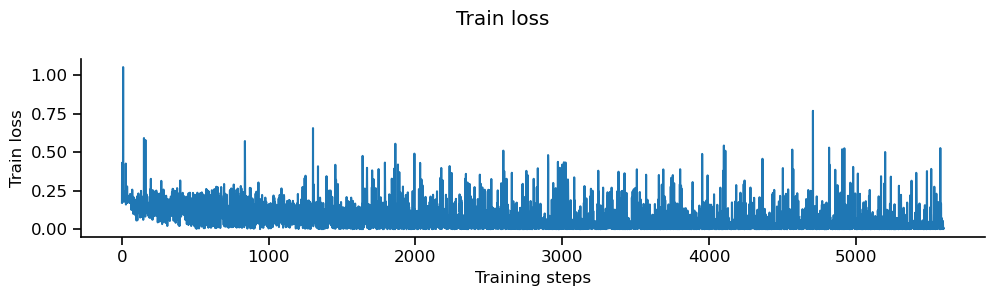

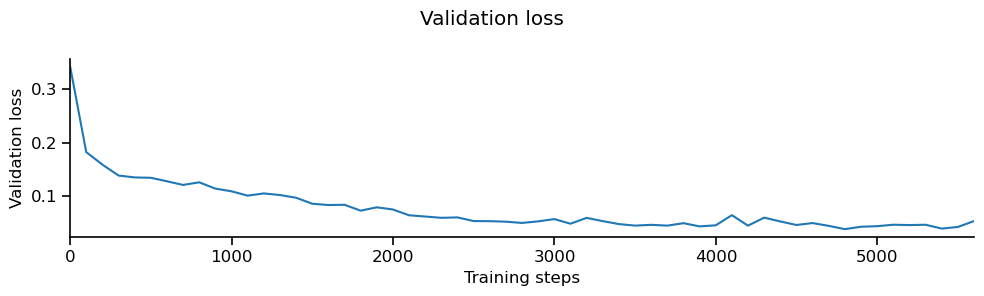

In [10]:
# Create network object
spiral_net = ut.build_EIANN_from_config(config_file_path, network_seed=network_seed)

# Train network
data_generator.manual_seed(data_seed)
spiral_net.train(train_dataloader, 
                test_dataloader, 
                epochs=1,
                val_interval=(0,-1,100),
                store_history=True,
                store_dynamics=True, 
                store_params=True,
                status_bar=True)

# # Optional: Save network object to pickle file
# saved_network_path = f"../saved_networks/spiral/{network_name}.pkl"
# ut.save_network(spiral_net, path=saved_network_path)

pt.plot_train_loss_history(spiral_net)
pt.plot_validate_loss_history(spiral_net)

Batch accuracy = 89.16999816894531%


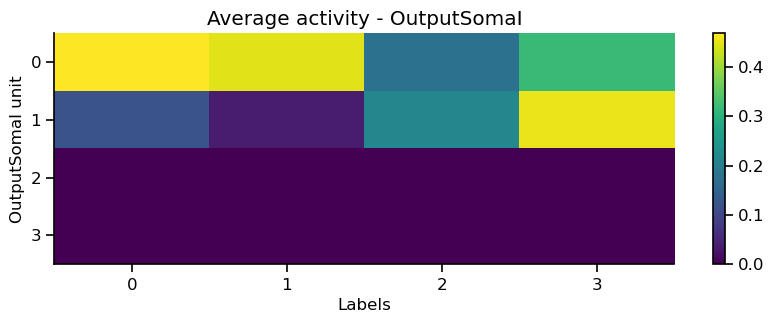

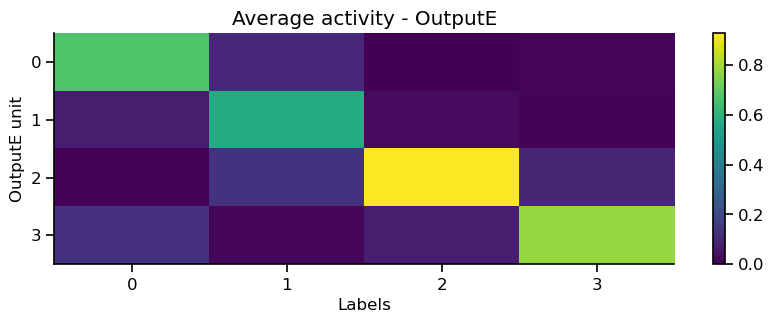

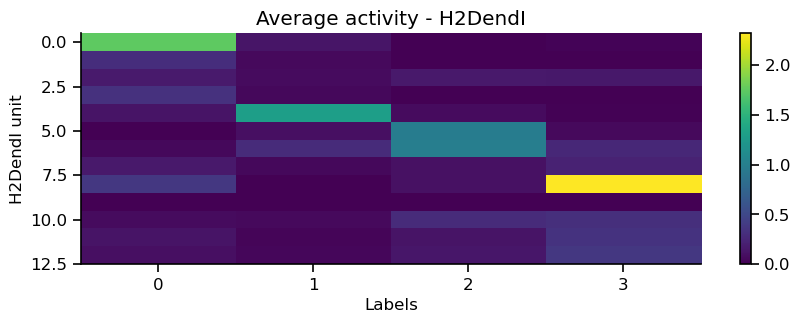

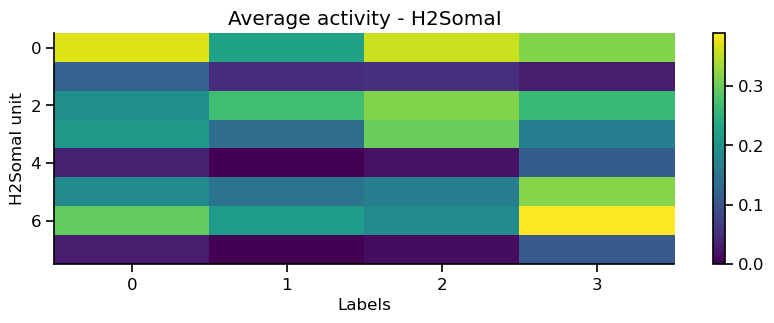

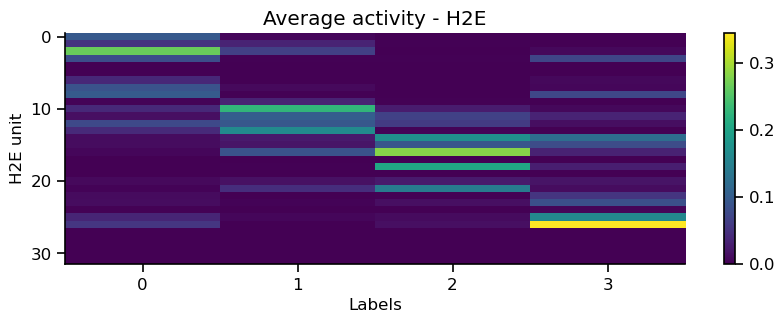

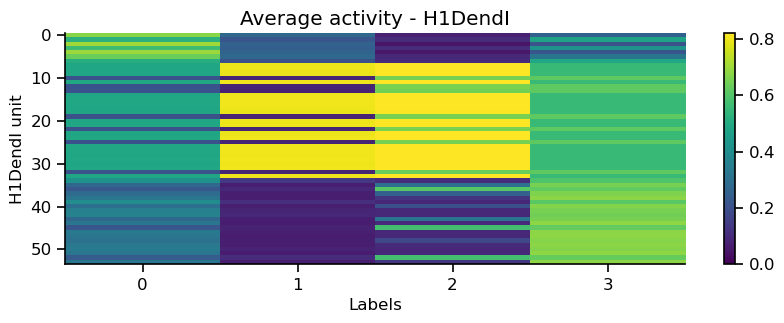

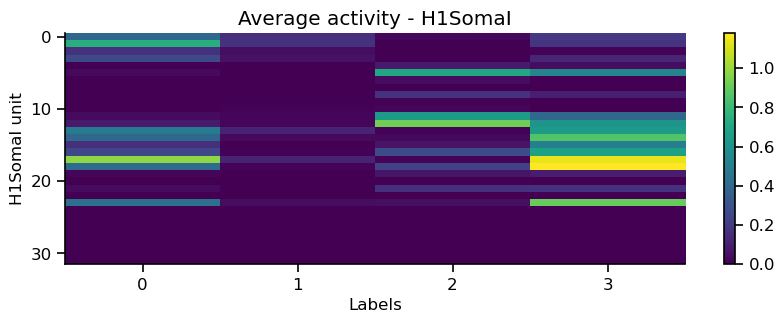

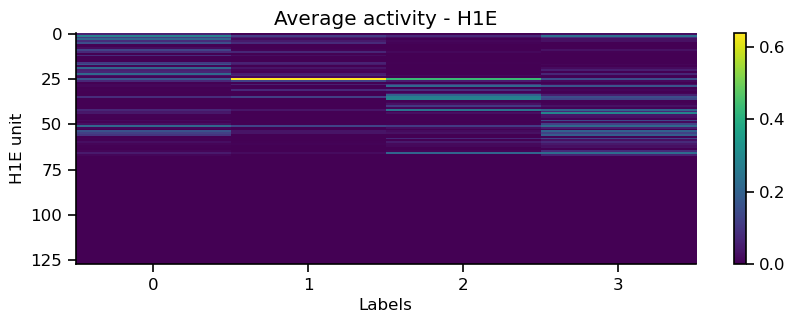

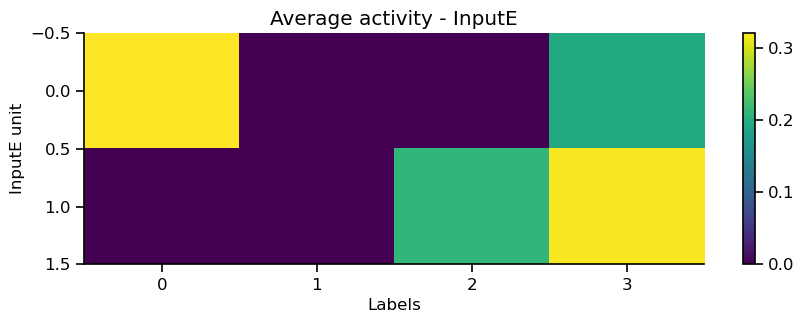

In [13]:
pt.plot_batch_accuracy(spiral_net, test_dataloader, population='all', title='')

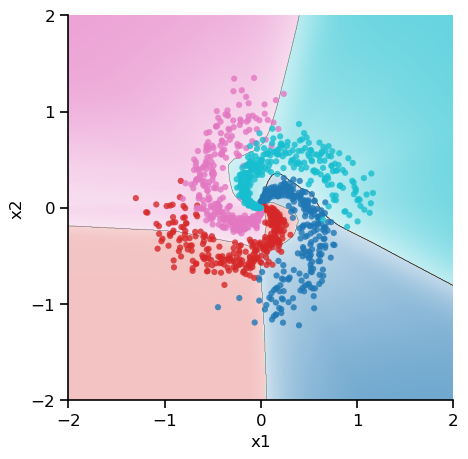

In [12]:
# Class decision boundaries
spiral_decision_data_dict = ut.compute_spiral_decisions_data(spiral_net, test_dataloader)
pt.plot_spiral_decisions(spiral_decision_data_dict, graph='decision', point_size=20)